## Пример построения  двухслойной нейронной сети на numpy

In [1]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

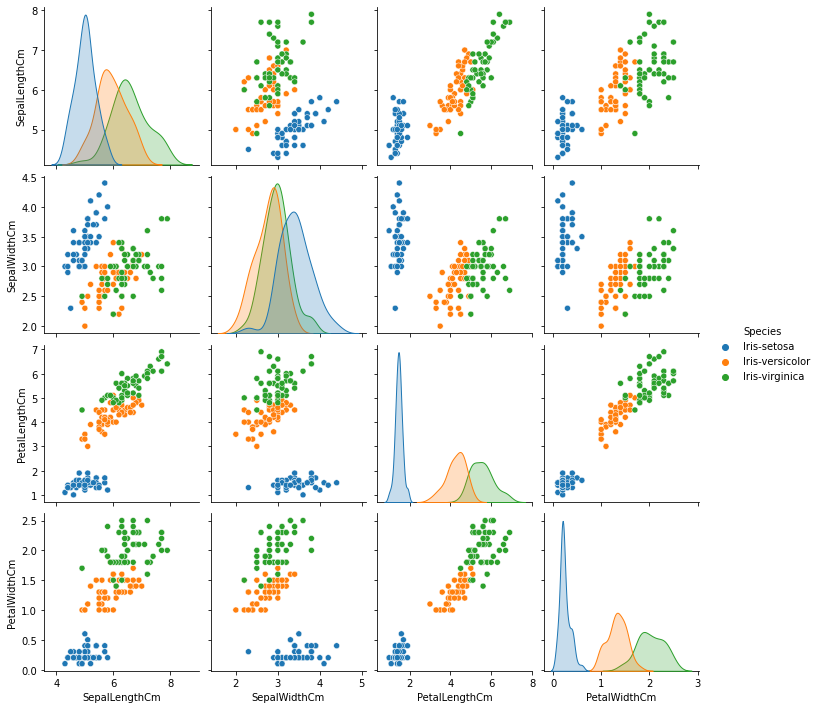

In [3]:

### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
#print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
#plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values) #x = normalize(x.as_matrix())

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values #y = y.as_matrix()
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

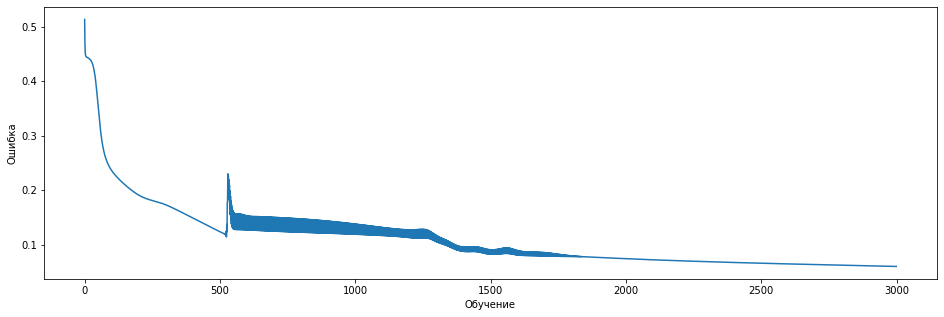

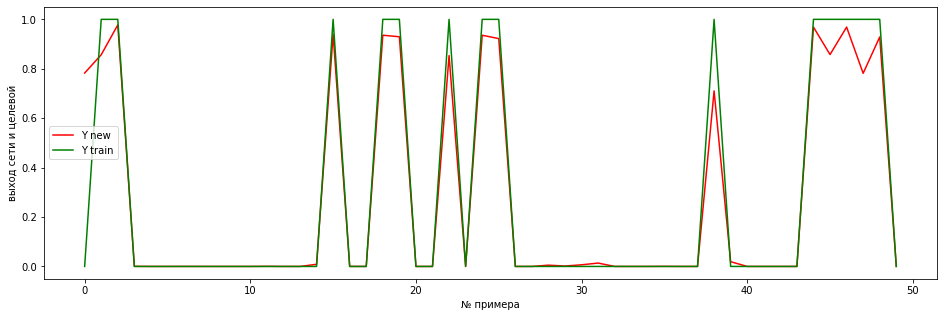

Аккуратность нейронной сети 94.0%


In [7]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5

# присваевание случайных весов

w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(3000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")



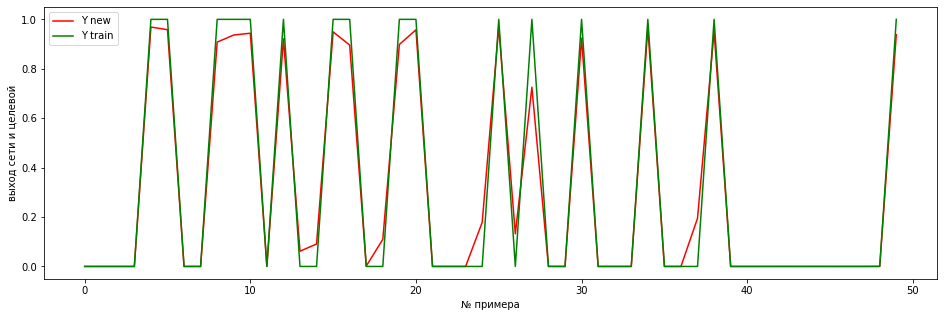

Аккуратность нейронной сети на тесте 94.82%


In [8]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

In [35]:
### Шаг 3. Обученние нейронной сети
results = []

#neuron_numb = 5 # определим число нейронов скрытого слоя
neuron_numbs = [3, 5, 7, 9]
#n = 0.1 # скорость обучения (learning rate)
learning_rates = [0.01, 0.05, 0.07, 0.1, 0.2, 0.5, 0.7]
#count_cycles = 3000
counts_cycles = [1000, 3000, 5000, 7000, 10000]

for neuron_numb in neuron_numbs:
    for n in learning_rates:
        for count_cycles in counts_cycles:
            # присваевание случайных весов
            w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
            w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
            errors = [] # массив для ошибок, чтобы потом построить график
            # процесс обучения
            for i in range(count_cycles):

                # прямое распространение(feed forward)
                layer0 = X_train
                layer1 = sigmoid(np.dot(layer0, w0))
                layer2 = sigmoid(np.dot(layer1, w1))

                # обратное распространение(back propagation) с использованием градиентного спуска
                layer2_error = y_train - layer2
                layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
                layer1_error = layer2_delta.dot(w1.T)
                layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
                w1 += layer1.T.dot(layer2_delta) * n
                w0 += layer0.T.dot(layer1_delta) * n
    
                error = np.mean(np.abs(layer2_error))
                errors.append(error)
                accuracy = (1 - error) * 100

                #print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

                # прямое распространение(feed forward)
            layer0_t = X_test
            layer1_t = sigmoid(np.dot(layer0_t, w0))
            layer2_t = sigmoid(np.dot(layer1_t, w1))
            layer2_error_t = y_test - layer2_t


            error_t = np.mean(np.abs(layer2_error_t))
            accuracy_t = (1 - error_t) * 100
            #print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")
            results.append({'neuron_numbs': neuron_numb, 'learning_rate': n, 'count_cycles': count_cycles, 
                                'acc на трейне': round(accuracy,2), 'acc на тесте': round(accuracy_t,2) })
for i in range(len(results)):
    print(results[i])
    if (i+1)%5==0 :
        print()

<ipython-input-2-6fc1c38edf69>:23: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


{'neuron_numbs': 3, 'learning_rate': 0.01, 'count_cycles': 1000, 'acc на трейне': 76.06, 'acc на тесте': 78.21}
{'neuron_numbs': 3, 'learning_rate': 0.01, 'count_cycles': 3000, 'acc на трейне': 82.55, 'acc на тесте': 85.0}
{'neuron_numbs': 3, 'learning_rate': 0.01, 'count_cycles': 5000, 'acc на трейне': 84.92, 'acc на тесте': 87.03}
{'neuron_numbs': 3, 'learning_rate': 0.01, 'count_cycles': 7000, 'acc на трейне': 87.4, 'acc на тесте': 89.43}
{'neuron_numbs': 3, 'learning_rate': 0.01, 'count_cycles': 10000, 'acc на трейне': 90.95, 'acc на тесте': 92.11}

{'neuron_numbs': 3, 'learning_rate': 0.05, 'count_cycles': 1000, 'acc на трейне': 85.13, 'acc на тесте': 86.66}
{'neuron_numbs': 3, 'learning_rate': 0.05, 'count_cycles': 3000, 'acc на трейне': 82.73, 'acc на тесте': 84.15}
{'neuron_numbs': 3, 'learning_rate': 0.05, 'count_cycles': 5000, 'acc на трейне': 87.75, 'acc на тесте': 90.41}
{'neuron_numbs': 3, 'learning_rate': 0.05, 'count_cycles': 7000, 'acc на трейне': 95.37, 'acc на тесте':

Выводы:
- увеличение количество итераций обучения - ведет к улучшению результатов, но до определенного момента - часто после при 10 000 итерациях результать хуже, чем при 7000
- количество нейронов скрытого слоя - явной зависимости от увеличения или уменьшения этого параметра я не увидела
- скорость обучения - при небольших значениях этого параметра прослеживается увеличение значения метрики, дальше связь не прослеживается

Таким образом, получается, что важно именно сочетание параметров.
Например, если маленькое значение learning rate и маленькое количество итерация, то качество будет хуже, чем при большем количестве итераций

Лучшие значения метрики
{'neuron_numbs': 7, 'learning_rate': 0.5, 'count_cycles': 3000, 'acc на трейне': 96.15, 'acc на тесте': 99.57}



## Практическое задание

<ol>
    <li>Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?</li>
</ol>